In [1]:
import numpy as np
import matplotlib.pyplot as plt
from concurrent.futures import ProcessPoolExecutor

# Utils

In [2]:
# generate random non-zero entries from [-10, -1] and [1, 10]
def generate_sparse_vector(N, s):
    x = np.zeros(N)
    non_zero_indices = np.random.choice(N, s, replace=False)
    for i in non_zero_indices:
        if np.random.rand() < 0.5:  # fifty-fifty chance to be positive or negative
            x[i] = np.random.uniform(-10, -1)
        else:
            x[i] = np.random.uniform(1, 10)
    return x

def generate_A_and_x(M, N, s):
    A = np.random.randn(M, N)
    A = A / np.sqrt(np.sum(A**2, axis=0))
    x = generate_sparse_vector(N, s)
    return A, x

def calculate_normalized_error(x, x_hat):
    return np.linalg.norm(x - x_hat) / np.linalg.norm(x)

# Noisy case: (n != 0)

## (a) s is known

In [3]:
def omp(A, y, s):
    # initialize
    residual = y
    index_set = []
    x = np.zeros(A.shape[1])

    for _ in range(s):
        # find the most correlated column
        idx = np.argmax(np.abs(A.T @ residual))
        index_set.append(idx)
        
        # update the solution
        A_selected = A[:, index_set]
        x_temp = np.linalg.lstsq(A_selected, y, rcond=None)[0]
        
        # update the residual
        residual = y - A_selected @ x_temp
    
    for i, idx in enumerate(index_set):
        x[idx] = x_temp[i]
    
    return x

def single_trial(M, N, s_max, sigma):
    A, x = generate_A_and_x(M, N, s_max)
    y = A @ x + np.random.normal(0, sigma, M)
    x_hat = omp(A, y, s_max)
    success = np.linalg.norm(x - x_hat) < 1e-3
    normalized_error = calculate_normalized_error(x, x_hat)
    return success, normalized_error

def experiment(N, s_max, M_values, sigma, num_trials=2000):
    success_rates = []
    normalized_errors = []
    
    with ProcessPoolExecutor() as executor:
        for M in M_values:
            results = list(executor.map(single_trial, [M]*num_trials, [N]*num_trials, [s_max]*num_trials, [sigma]*num_trials))
            
            success_count = sum(1 for success, _ in results if success)
            total_normalized_error = sum(error for _, error in results)
            
            success_rate = success_count / num_trials
            average_normalized_error = total_normalized_error / num_trials
            
            success_rates.append(success_rate)
            normalized_errors.append(average_normalized_error)
    
    return success_rates, normalized_errors

s_max=1
success_rates=[0.048, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 errors=[1.3463348790191352, 2.0801308338231432e-05, 2.0898005888176193e-05, 1.937206580157919e-05, 2.1622346882405782e-05, 1.9378670969252347e-05, 2.2939495899749106e-05, 2.0957417819390068e-05, 2.128077998951005e-05, 2.036496148698237e-05]
s_max=2
success_rates=[0.0, 0.0, 0.055, 0.22, 0.498, 0.6095, 0.736, 0.8205, 0.9125, 0.9305],
 errors=[1.082638470348877, 1.22530466783305, 1.0545019173281216, 0.81843952355564, 0.5225964771474308, 0.41009351143368356, 0.2730779054656885, 0.1894359523700245, 0.10159071208557699, 0.07279097390348012]
s_max=3
success_rates=[0.0, 0.0, 0.0, 0.0085, 0.0655, 0.1795, 0.3215, 0.5015, 0.5775, 0.7],
 errors=[1.0228489176550337, 1.170396956446241, 1.2045018245694237, 1.1043184837644662, 0.9534606146729563, 0.8020406635587556, 0.6586777786967487, 0.44669721108587224, 0.3794735300699965, 0.28219343291938287]
s_max=4
success_rates=[0.0, 0.0, 0.0, 0.0005, 0.0025, 0.016, 0.0595, 0.1755, 0.2

/tmp/ipykernel_109469/2311186972.py:25: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 2, 1)


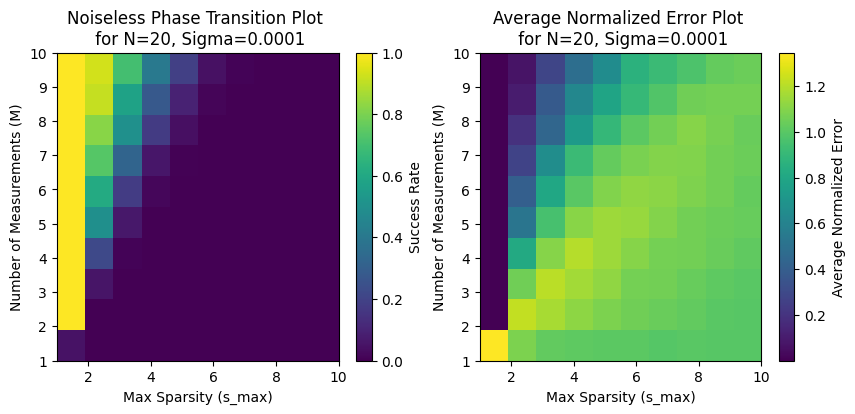

s_max=1
success_rates=[0.002, 0.9965, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 errors=[1.4113838689619735, 0.004971277775183462, 2.0743674234593657e-05, 2.0962751190610123e-05, 2.063179461631182e-05, 2.094484711682276e-05, 2.1211704850692384e-05, 2.0903540593579016e-05, 2.2228628295683023e-05, 2.0080309079201453e-05, 2.0810963858125182e-05, 2.0197071782364544e-05, 2.1077923600601837e-05, 2.080236951561327e-05, 1.966203168602893e-05, 2.110197846624199e-05, 1.911445743772425e-05, 2.0407338892926684e-05, 2.1857403440109375e-05, 2.0441483701136192e-05, 2.0486622696745987e-05, 2.0154090817462634e-05, 2.120329768768134e-05, 2.0930970315715432e-05, 2.112343694435346e-05]
s_max=2
success_rates=[0.0, 0.0, 0.009, 0.0765, 0.2855, 0.4375, 0.5805, 0.696, 0.7775, 0.843, 0.88, 0.9225, 0.945, 0.96, 0.9755, 0.9745, 0.9825, 0.9885, 0.9885, 0.9945, 0.993, 0.998, 0.999, 0.997, 0.9975],
 errors=[1.1097083301424657, 1.36090856484412

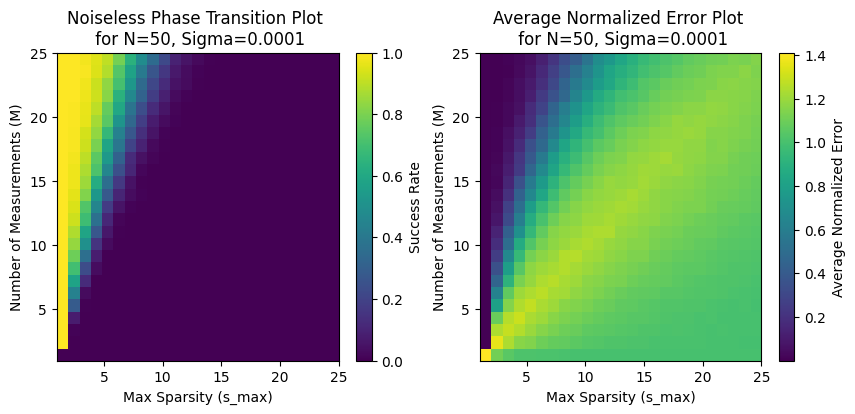

s_max=1
success_rates=[0.016, 0.9995, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 errors=[1.3915864121406978, 0.0007265035967740929, 2.142518761472851e-05, 2.027478065312459e-05, 1.9527370470286536e-05, 2.0213284209907915e-05, 2.0340937499968578e-05, 2.0873627850334177e-05, 2.0403833091552145e-05, 2.052294471195886e-05, 1.9973770768484475e-05, 2.1110800031740498e-05, 2.06149503374122e-05, 2.0003829764713426e-05, 2.002921434649834e-05, 2.0879647875858005e-05, 2.0238395168345856e-05, 2.079899859211195e-05, 2.0473462621274092e-05, 1.946343261725648e-05, 2.036283264076065e-05, 2.095988282623126e-05, 2.0780527089787806e-05, 2.0152832691693138e-05, 2.0195868964508045e-05, 2.0244049368698448e-05, 1.9677269615133782e-05, 2.0476522812391176e-05, 2.0982741762587795e-05, 1.935790516614534e-05, 2.085830

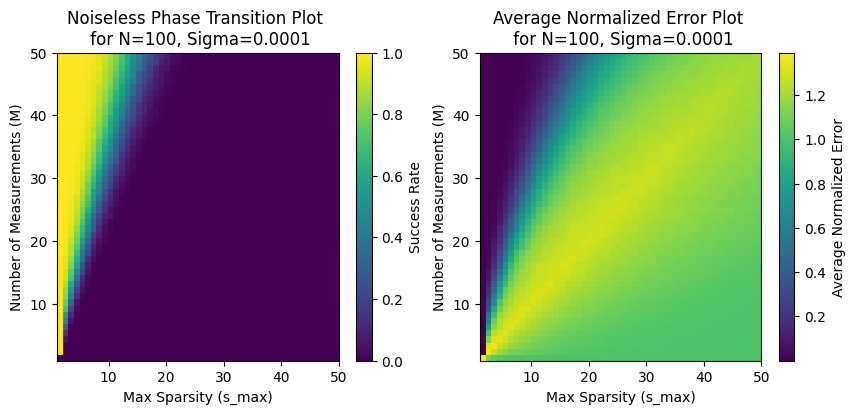

s_max=1
success_rates=[0.032, 0.67, 0.69, 0.685, 0.6495, 0.6595, 0.642, 0.664, 0.6835, 0.699],
 errors=[1.3463660235421493, 0.0002013370086695036, 0.0002102879588714514, 0.0002055535426650011, 0.00022277923257888358, 0.0001964168446464543, 0.0002324349457185599, 0.0002233123304669133, 0.00021464970805548832, 0.0002053609719249382]
s_max=2
success_rates=[0.0, 0.0, 0.0185, 0.0835, 0.183, 0.2285, 0.278, 0.3085, 0.3205, 0.3545],
 errors=[1.0813244329897087, 1.2267266391020941, 1.0570082189635006, 0.8458921369306925, 0.5179653917502932, 0.4132259706845628, 0.2525873552700909, 0.18388776915876417, 0.10820270725697055, 0.08693096779172853]
s_max=3
success_rates=[0.0, 0.0, 0.0, 0.0, 0.0035, 0.0295, 0.056, 0.1035, 0.079, 0.134],
 errors=[1.0234696477592466, 1.1432065810653949, 1.2009171009421038, 1.1072536560485364, 0.955903648177996, 0.7982492602758235, 0.6568730519359434, 0.45287002594605463, 0.382301420027978, 0.2677158206419551]
s_max=4
success_rates=[0.0, 0.0, 0.0, 0.0, 0.0, 0.002, 0.008, 

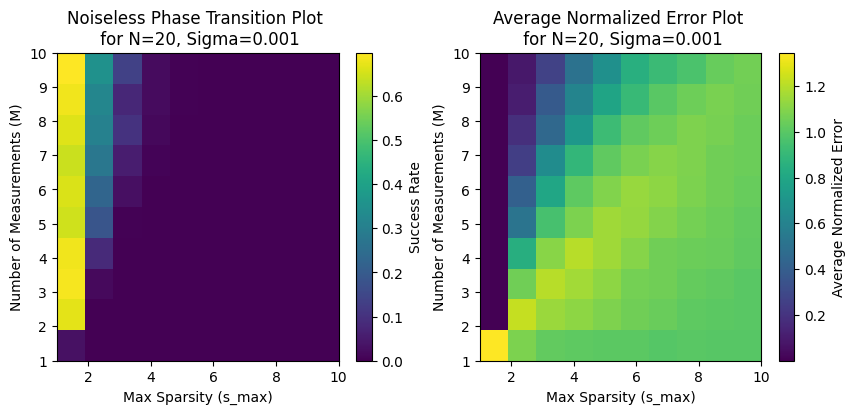

s_max=1
success_rates=[0.0, 0.646, 0.696, 0.6875, 0.704, 0.6705, 0.6825, 0.677, 0.667, 0.674, 0.6935, 0.6835, 0.6715, 0.6675, 0.6865, 0.665, 0.6705, 0.7095, 0.664, 0.675, 0.6735, 0.6775, 0.697, 0.7035, 0.6905],
 errors=[1.412078280666168, 0.021428984949444552, 0.00019646892756081067, 0.0002027135704560569, 0.00019734077625280545, 0.00021129724624228464, 0.0001958451795955762, 0.0002109637182589956, 0.0002107618887717143, 0.0002096833900260711, 0.00020104513124402654, 0.00021210613387902708, 0.00020114132936317077, 0.00021575477038470595, 0.00020638500630085422, 0.0002078723063563626, 0.0002170176299594803, 0.00020546855300638132, 0.00021629807416739485, 0.00020897826393059002, 0.00020671486087660146, 0.00020327565912776053, 0.00020756977129926985, 0.00019234285513652845, 0.0001997819731655581]
s_max=2
success_rates=[0.0, 0.0, 0.0025, 0.0275, 0.12, 0.171, 0.2055, 0.2655, 0.3075, 0.32, 0.3295, 0.3485, 0.36, 0.368, 0.368, 0.3495, 0.365, 0.3815, 0.3695, 0.3705, 0.3595, 0.371, 0.368, 0.386,

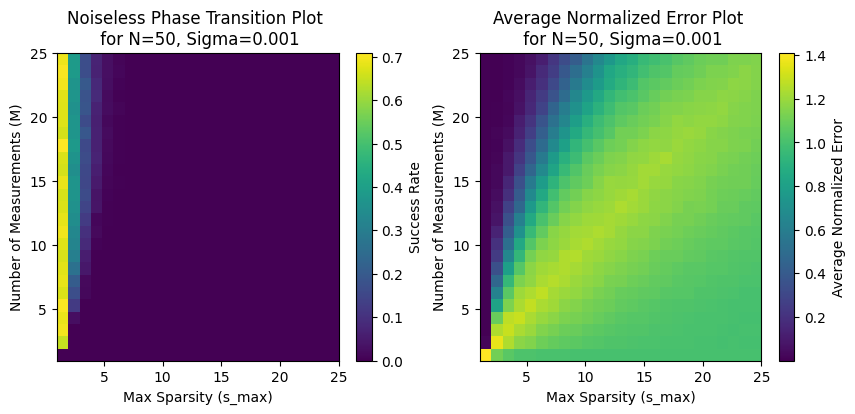

s_max=1
success_rates=[0.016, 0.684, 0.6805, 0.6825, 0.694, 0.694, 0.718, 0.6865, 0.701, 0.676, 0.7, 0.6825, 0.6645, 0.6905, 0.6925, 0.688, 0.6975, 0.692, 0.679, 0.6725, 0.6745, 0.698, 0.68, 0.688, 0.683, 0.6725, 0.697, 0.675, 0.675, 0.6945, 0.6775, 0.7, 0.687, 0.672, 0.6725, 0.6855, 0.6735, 0.676, 0.704, 0.693, 0.6565, 0.66, 0.6595, 0.692, 0.6915, 0.6765, 0.6915, 0.6825, 0.684, 0.688],
 errors=[1.3915885563837282, 0.014331084701950493, 0.00021901282354106204, 0.00020974653860286602, 0.00019519116094513214, 0.00020660207508576222, 0.00020058436841711015, 0.00020479382682930006, 0.00019532135372487858, 0.00020500174799619857, 0.0002076035508371599, 0.00020732434943356351, 0.00020871255979818925, 0.00020101766053760191, 0.00019469314049250493, 0.000202962363224548, 0.00019440271989198073, 0.000203609203048299, 0.0002018277654196907, 0.00020762768817912607, 0.00020631681547504012, 0.00020846699079337424, 0.00020737962983160052, 0.00021855131612135497, 0.0002145761309773767, 0.000203917669

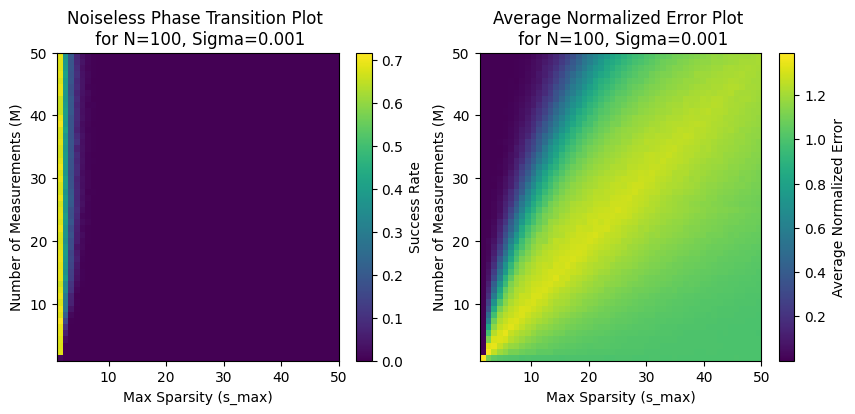

In [4]:
N_values = [20, 50, 100]
sigma_values = [0.0001, 0.001]

for sigma in sigma_values:
    for N in N_values:
        # Experiment settings
        M_values = np.arange(1, int(N / 2) + 1)
        s_max_values = np.arange(1, int(N / 2) + 1)

        # Results
        s_all_success_rates = []
        s_all_errors = []

        # Run the experiment
        for s_max in s_max_values:
            success_rates, errors = experiment(N, s_max, M_values, sigma)
            print(f's_max={s_max}')
            print(f'success_rates={success_rates},\n errors={errors}')
            s_all_success_rates.append(success_rates)
            s_all_errors.append(errors)

        # Plot the results for success rates
        plt.figure(figsize=(10, 4))
        plt.title('Noiseless Phase Transition Plot for Sigma={}'.format(sigma))
        plt.subplot(1, 2, 1)
        plt.imshow(np.transpose(s_all_success_rates), extent=[s_max_values[0], s_max_values[-1], M_values[0], M_values[-1]], origin='lower', aspect='auto', cmap='viridis')
        plt.colorbar(label='Success Rate')
        plt.xlabel('Max Sparsity (s_max)')
        plt.ylabel('Number of Measurements (M)')
        plt.title('Noiseless Phase Transition Plot \n for N={}, Sigma={}'.format(N, sigma))

        # Plot the results for average normalized errors
        plt.subplot(1, 2, 2)
        plt.imshow(np.transpose(s_all_errors), extent=[s_max_values[0], s_max_values[-1], M_values[0], M_values[-1]], origin='lower', aspect='auto', cmap='viridis')
        plt.colorbar(label='Average Normalized Error')
        plt.xlabel('Max Sparsity (s_max)')
        plt.ylabel('Number of Measurements (M)')
        plt.title('Average Normalized Error Plot \n for N={}, Sigma={}'.format(N, sigma))
        
        plt.show()
